In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv_files/drug200.csv")
print(data.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


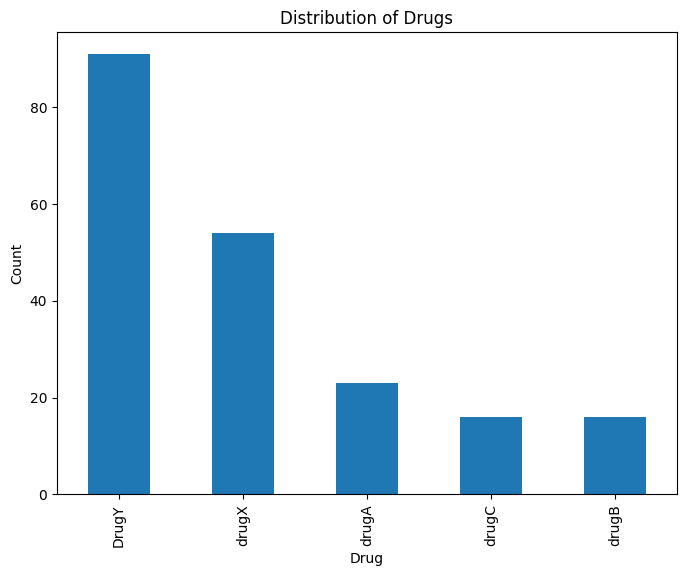

In [ ]:
plt.figure(figsize=(8, 6))
data['Drug'].value_counts().plot(kind='bar')
plt.title('Distribution of Drugs')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

<ipython-input-7-732e24a180c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


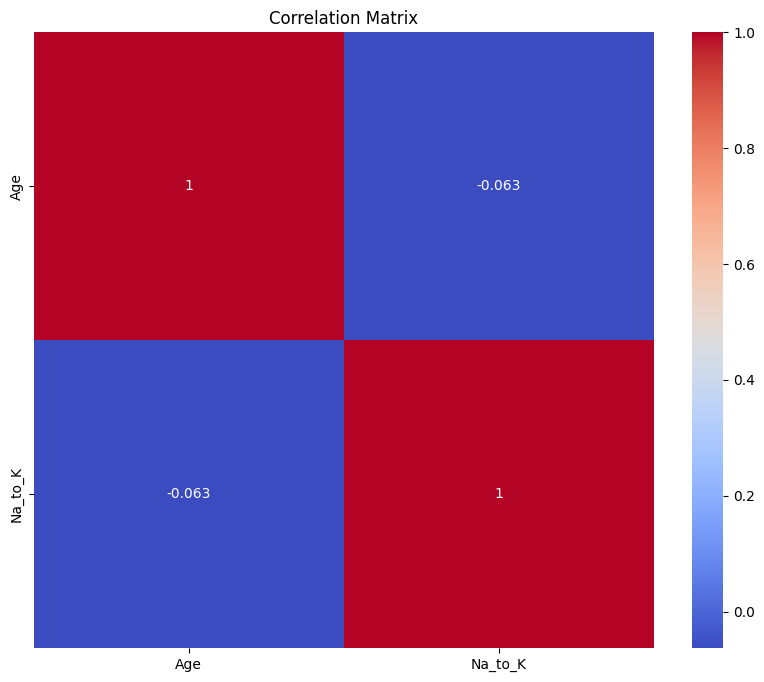

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

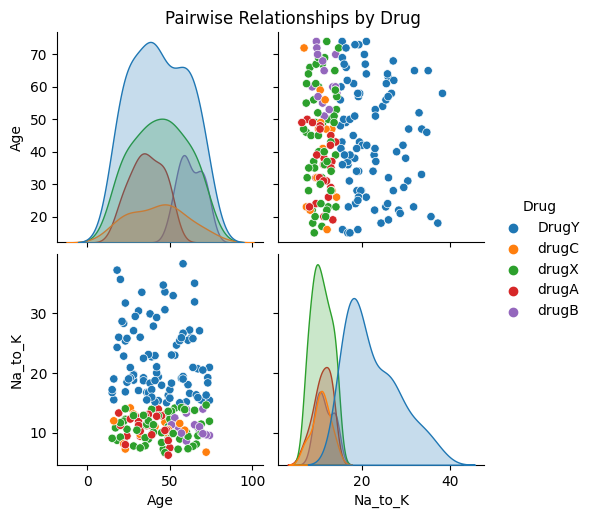

In [ ]:
sns.pairplot(data=data, hue='Drug', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Drug', y=1.02)
plt.show()

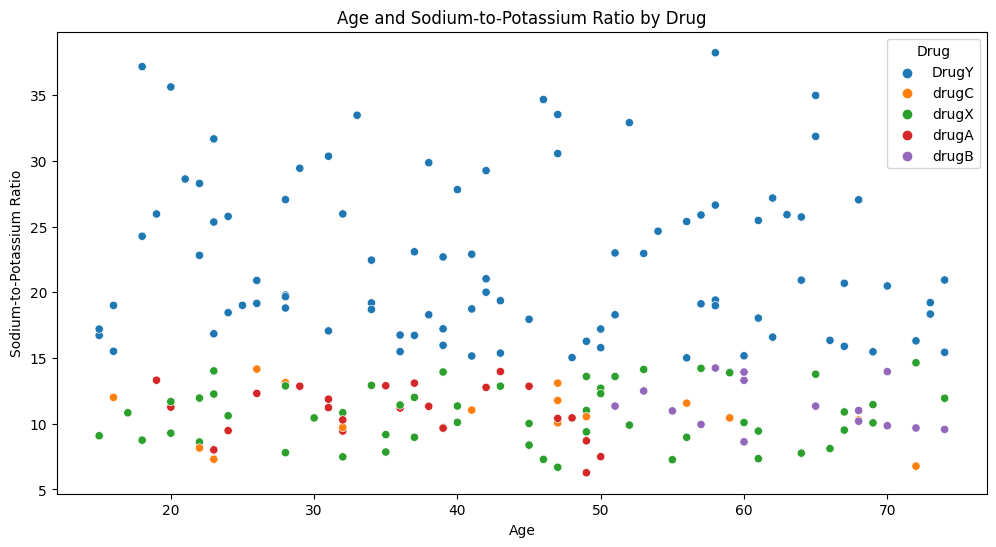

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Age', y='Na_to_K', hue='Drug')
plt.title('Age and Sodium-to-Potassium Ratio by Drug')
plt.xlabel('Age')
plt.ylabel('Sodium-to-Potassium Ratio')
plt.show()

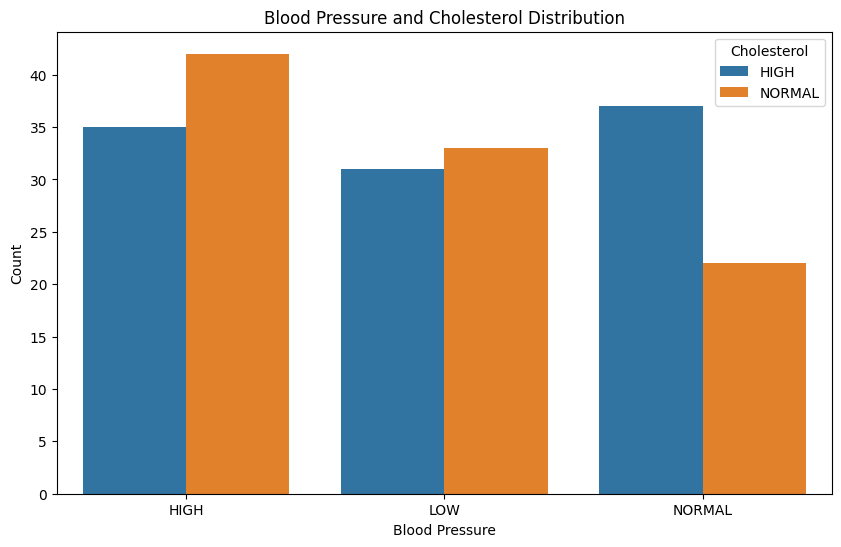

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='BP', hue='Cholesterol')
plt.title('Blood Pressure and Cholesterol Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

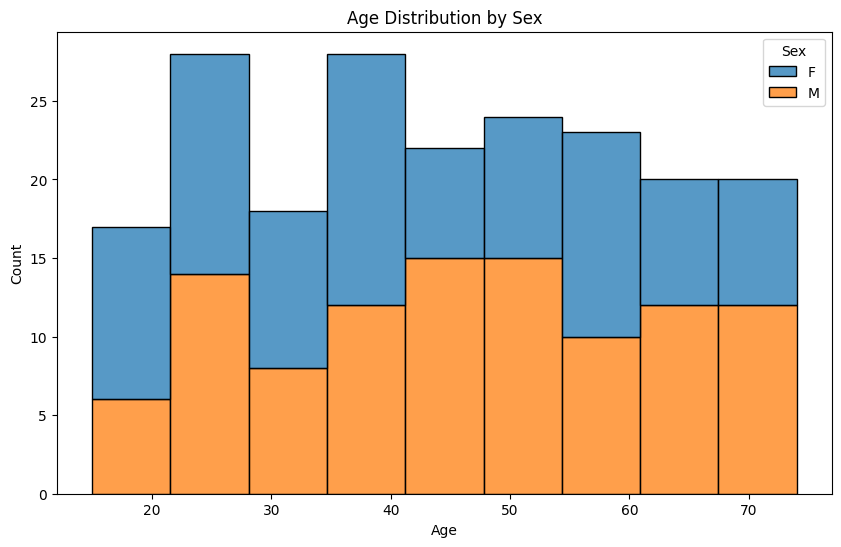

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Sex', multiple='stack')
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(data, x='Age', y='Na_to_K', color='Drug', hover_name='Drug')
fig.update_layout(title='Interactive Scatter Plot: Age vs. Sodium-to-Potassium Ratio',
                  xaxis_title='Age',
                  yaxis_title='Sodium-to-Potassium Ratio')

fig.show()

In [ ]:
fig = px.bar(data, x='Drug', color='Sex', title='Interactive Bar Plot: Drug Distribution by Sex')

fig.show()

In [ ]:
fig = px.scatter_3d(data, x='Age', y='Na_to_K', z='Cholesterol', color='Drug')

fig.update_layout(title='Interactive 3D Scatter Plot: Age, Sodium-to-Potassium Ratio, and Cholesterol',
                  scene=dict(xaxis_title='Age', yaxis_title='Sodium-to-Potassium Ratio', zaxis_title='Cholesterol'))

fig.show()

In [ ]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])

X = data.drop(columns=['Drug'])
y = data['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

svc_classifier = SVC(kernel='linear')
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()


svc_classifier.fit(X_train_scaled, y_train)
dt_classifier.fit(X_train_scaled, y_train)
rf_classifier.fit(X_train_scaled, y_train)


svc_pred = svc_classifier.predict(X_test_scaled)
dt_pred = dt_classifier.predict(X_test_scaled)
rf_pred = rf_classifier.predict(X_test_scaled)


svc_report = classification_report(y_test, svc_pred)
dt_report = classification_report(y_test, dt_pred)
rf_report = classification_report(y_test, rf_pred)

print("SVM Classifier Report:\n", svc_report)
print("Decision Tree Classifier Report:\n", dt_report)
print("Random Forest Classifier Report:\n", rf_report)


SVM Classifier Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Decision Tree Classifier Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       

In [ ]:

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)


pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_train_scaled)


agglomerative = AgglomerativeClustering(n_clusters=5)
agglomerative_labels = agglomerative.fit_predict(X_train_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score


silhouette_avg = silhouette_score(X_train_scaled, kmeans_labels)
print("Silhouette Score:", silhouette_avg)


ari_score = adjusted_rand_score(y_train, kmeans_labels)
print("Adjusted Rand Index:", ari_score)


Silhouette Score: 0.25149955066119023
Adjusted Rand Index: 0.030073616277870946


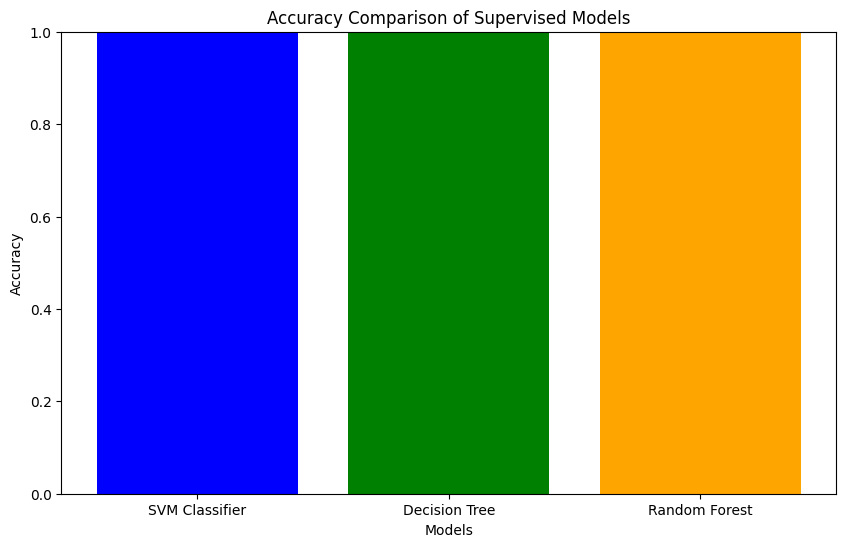

In [ ]:



models = ['SVM Classifier', 'Decision Tree', 'Random Forest']
accuracies = [1.00, 1.00, 1.00]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Supervised Models')
plt.ylim(0, 1)  # Set y-axis limit
plt.show()
